## Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

dataset = pd.concat([train, test], axis=0, sort=False)

dataset.to_csv('dataset.csv', index=False)

In [3]:
dataset.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                               float64
dtype: object

In [4]:
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# transform object cols to category
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].astype('category')

category_cols = dataset.select_dtypes(include=['category']).columns

## EDA

### Differences between train and test

In [5]:
# Unique test values
for column in dataset.columns:
    if dataset[column].dtype.name == 'category':
        train_values = set(dataset[dataset["Depression"].notnull()][column].dropna().unique())
        test_values = set(dataset[dataset["Depression"].isnull()][column].dropna().unique())
        unique_test_values = test_values - train_values
        if unique_test_values:
            unique_test_counts = dataset[dataset[column].isin(unique_test_values)][column].value_counts()
            sorted_unique_test_counts = unique_test_counts.sort_values(ascending=False)
            print(f'Column: {column}')
            print('Unique values in test set not present in train set:')
            print(sorted_unique_test_counts)
            print('-' * 40)

Column: Name
Unique values in test set not present in train set:
Name
Anishwarya    3
Aarsha        2
Rya           2
Surat         2
Aarohan       2
             ..
Sara          0
Satyam        0
Saurav        0
Shaina        0
Mira          0
Name: count, Length: 554, dtype: int64
----------------------------------------
Column: City
Unique values in test set not present in train set:
City
Siddhesh         3
Hrithik          2
Vikram           2
Is Kanpur        1
Mhopal           1
                ..
Tushar           0
Unirar           0
Vaanya           0
Vadodara         0
Visakhapatnam    0
Name: count, Length: 124, dtype: int64
----------------------------------------
Column: Profession
Unique values in test set not present in train set:
Profession
Unhealthy               2
MD                      2
Surat                   2
Manvi                   1
B.Pharm                 1
                       ..
Unveil                  0
Visakhapatnam           0
Working Professional    0

In [6]:
# Unique train values
for column in dataset.columns:
    if dataset[column].dtype.name == 'category':
        train_values = set(dataset[dataset["Depression"].notnull()][column].dropna().unique())
        test_values = set(dataset[dataset["Depression"].isnull()][column].dropna().unique())
        unique_train_values = train_values - test_values
        if unique_train_values:
            unique_train_counts = dataset[dataset[column].isin(unique_train_values)][column].value_counts()
            sorted_unique_train_counts = unique_train_counts.sort_values(ascending=False)
            print(f'Column: {column}')
            print('Unique values in train set not present in test set:')
            print(sorted_unique_train_counts)
            print('-' * 40)

Column: Name
Unique values in train set not present in test set:
Name
Aarash      3
Tarsh       3
Shivvi      2
Aan         2
Pradhya     2
           ..
Rupal       0
Vibha       0
Samaira     0
Rupendra    0
Zvi         0
Name: count, Length: 554, dtype: int64
----------------------------------------
Column: City
Unique values in train set not present in test set:
City
Mihir            7
Nandini          4
Harsha           3
Mahi             3
M.Com            2
                ..
Ludhiana         0
Nalini           0
Chemist          0
Golkata          0
Visakhapatnam    0
Name: count, Length: 124, dtype: int64
----------------------------------------
Column: Profession
Unique values in train set not present in test set:
Profession
Academic             5
BCA                  3
MBA                  2
FamilyVirar          1
BE                   1
                    ..
Travel Consultant    0
Manvi                0
24th                 0
ME                   0
M.Tech               0
Na

### Correlations

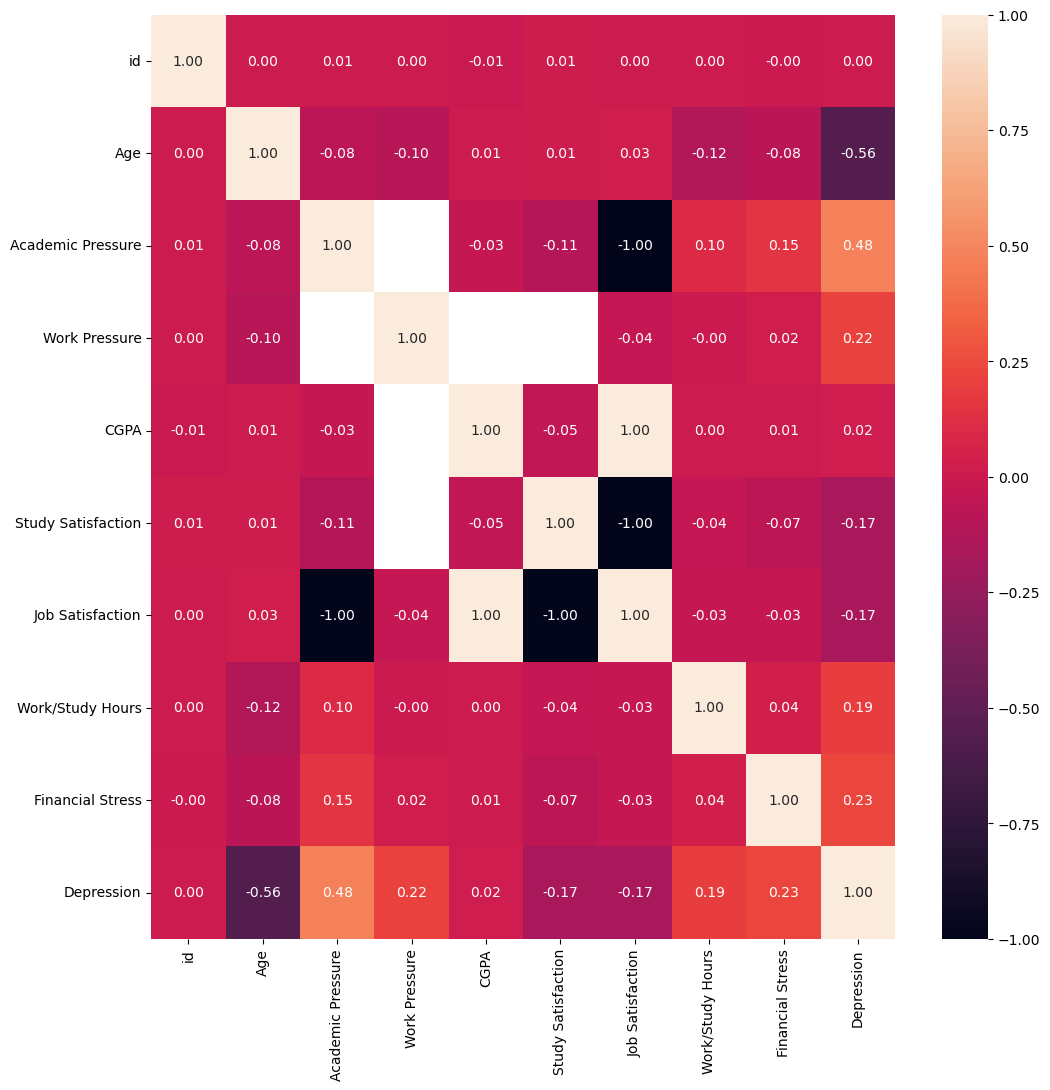

In [7]:
correlation_matrix = train[numerical_cols].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()


### Depression

C:\Users\Stefan\AppData\Local\Temp\ipykernel_884\722206302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='viridis')


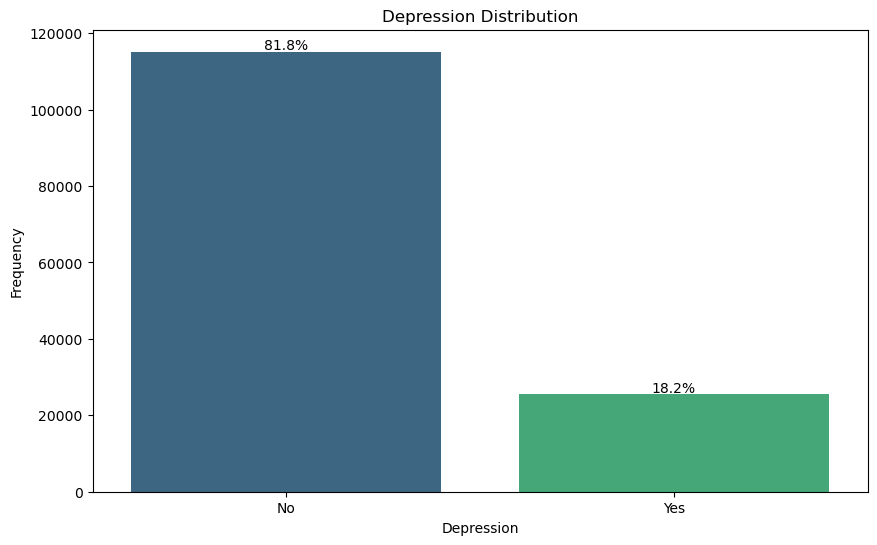

In [ ]:
# Calculate the counts and percentages for the Depression column
depression_counts = train['Depression'].value_counts()
depression_percentages = (depression_counts / len(train)) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='viridis')

for i, percentage in enumerate(depression_percentages):
    ax.text(i, depression_counts.values[i] + 500, f'{percentage:.1f}%', ha='center')

plt.title('Depression Distribution')
plt.xlabel('Depression')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

### Family History of Mental Illness

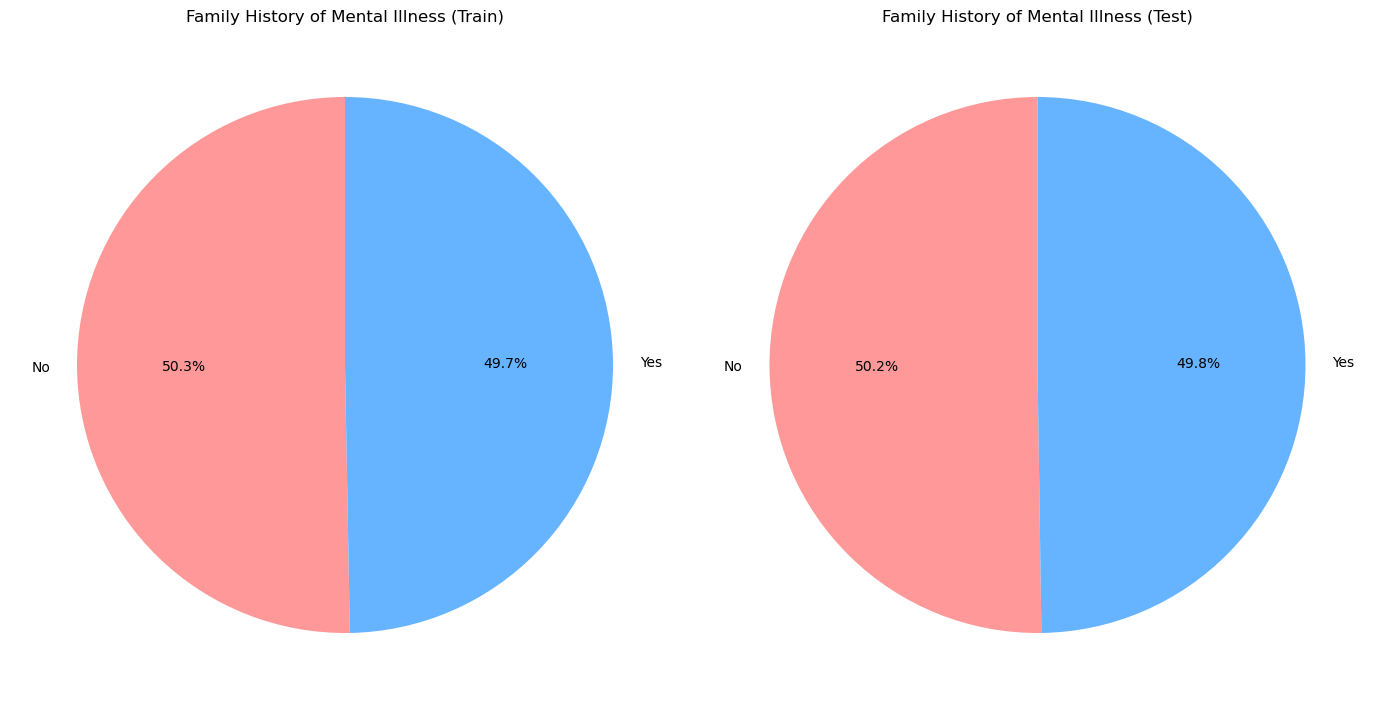

In [ ]:
# Calculate the counts for Family History of Mental Illness in train and test datasets
train_family_history_counts = train['Family History of Mental Illness'].value_counts()
test_family_history_counts = test['Family History of Mental Illness'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(train_family_history_counts, labels=train_family_history_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_title('Family History of Mental Illness (Train)')

axes[1].pie(test_family_history_counts, labels=test_family_history_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[1].set_title('Family History of Mental Illness (Test)')

plt.tight_layout()
plt.show()

### Financial Stress

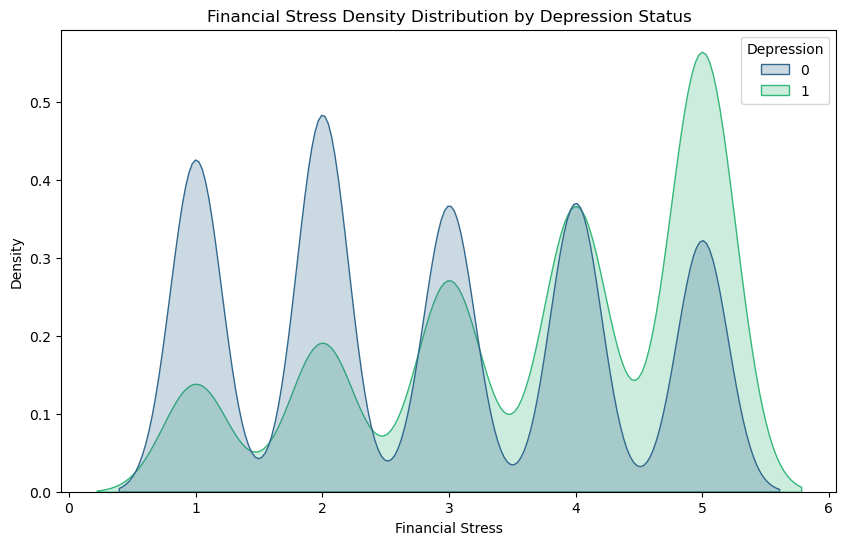

In [ ]:
plt.figure(figsize=(10, 6))


sns.kdeplot(
    data=train, 
    x='Financial Stress', 
    hue='Depression', 
    fill=True, 
    common_norm=False,  
    bw_adjust=1.5,      
    palette='viridis'
)

plt.title('Financial Stress Density Distribution by Depression Status')
plt.xlabel('Financial Stress')
plt.ylabel('Density')

plt.show()

### Work/Study Hours

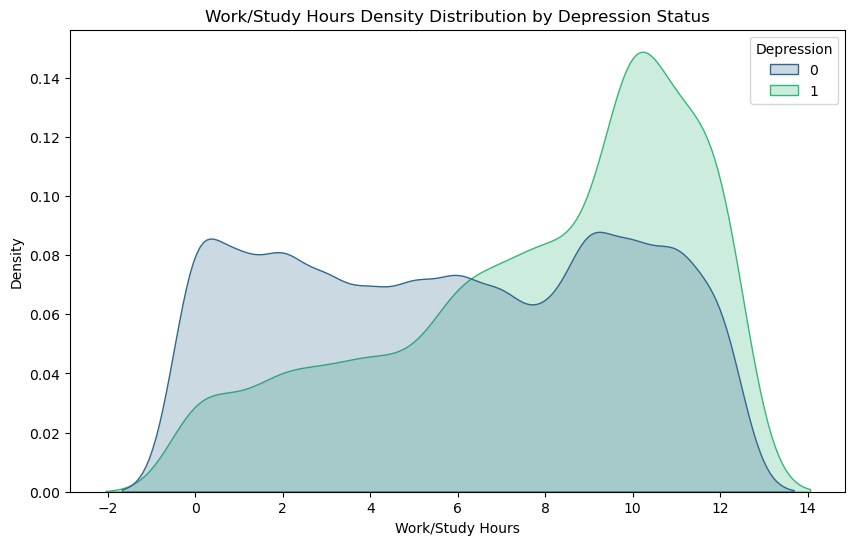

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=train, 
    x='Work/Study Hours', 
    hue='Depression', 
    fill=True, 
    common_norm=False, 
    bw_adjust=1.5,      
    palette='viridis'
)

plt.title('Work/Study Hours Density Distribution by Depression Status')
plt.xlabel('Work/Study Hours')
plt.ylabel('Density')

plt.show()

### Degree
- only 27 relevant values

In [12]:
dataset['Degree'].value_counts().head(30)

Degree
Class 12    24541
B.Ed        19453
B.Arch      14779
B.Com       13552
B.Pharm      9843
BCA          9608
M.Ed         9375
MCA          8672
BBA          8417
BSc          8341
MSc          7975
LLM          7780
M.Pharm      7532
M.Tech       7492
B.Tech       7310
LLB          7286
BHM          7081
MBA          6288
BA           6240
ME           6023
MD           5672
MHM          5435
BE           5270
M.Com        5222
PhD          5176
MBBS         5115
MA           4820
M.Arch         14
B.Sc            7
BPharm          5
Name: count, dtype: int64

### Dietary habits
- only 3 relevant values

In [13]:
dataset['Dietary Habits'].value_counts()

Dietary Habits
Moderate             82723
Unhealthy            77013
Healthy              74707
No                       8
More Healthy             4
1.0                      2
Male                     2
Less Healthy             2
Indoor                   2
Yes                      2
Gender                   1
Electrician              1
Vivaan                   1
Vegas                    1
3                        1
Soham                    1
Resistant                1
Raghav                   1
Pratham                  1
Prachi                   1
No Healthy               1
5 Healthy                1
Naina                    1
5 Unhealthy              1
Academic                 1
Mihir                    1
Mealy                    1
BSc                      1
2                        1
M.Tech                   1
Less than Healthy        1
Class 12                 1
Kolkata                  1
Educational              1
Hormonal                 1
MCA                      1
Name: count, 

### Sleep Duration
- only 4 relevant values

In [14]:
dataset['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours                      64445
7-8 hours                              61460
More than 8 hours                      54916
5-6 hours                              53546
3-4 hours                                 15
6-7 hours                                 15
4-5 hours                                 13
2-3 hours                                  9
8-9 hours                                  8
4-6 hours                                  7
1-6 hours                                  6
No                                         4
6-8 hours                                  4
9-5                                        3
9-11 hours                                 3
Unhealthy                                  3
9-5 hours                                  3
1-2 hours                                  3
than 5 hours                               2
Meerut                                     2
9-6 hours                                  2
Sleep_Duration                          

### Job Satisfaction

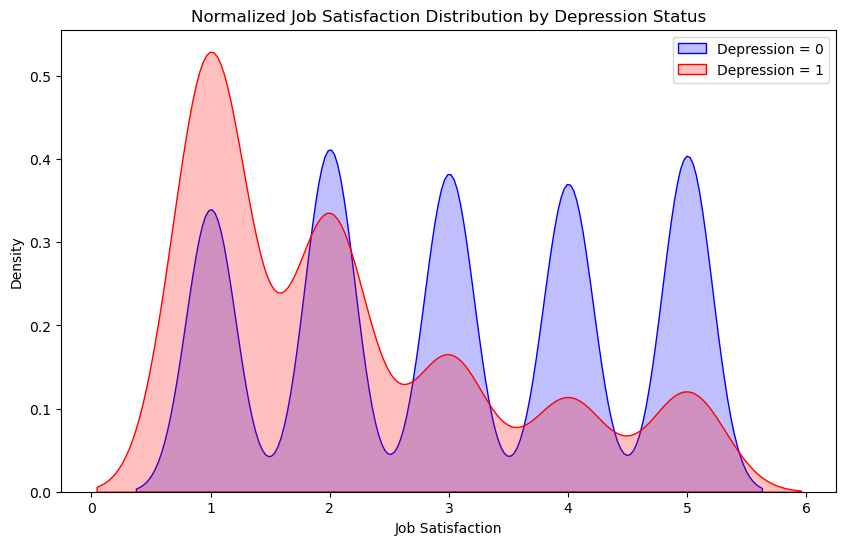

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=train[train['Depression'] == 0], 
    x='Job Satisfaction', 
    color='blue', 
    label='Depression = 0', 
    fill=True,
    common_norm=False,  
    bw_adjust=1.5     
)

sns.kdeplot(
    data=train[train['Depression'] == 1], 
    x='Job Satisfaction', 
    color='red', 
    label='Depression = 1', 
    fill=True,
    common_norm=False,  
    bw_adjust=1.5    
)

plt.title('Normalized Job Satisfaction Distribution by Depression Status')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.legend()

plt.show()

### Study Satisfaction

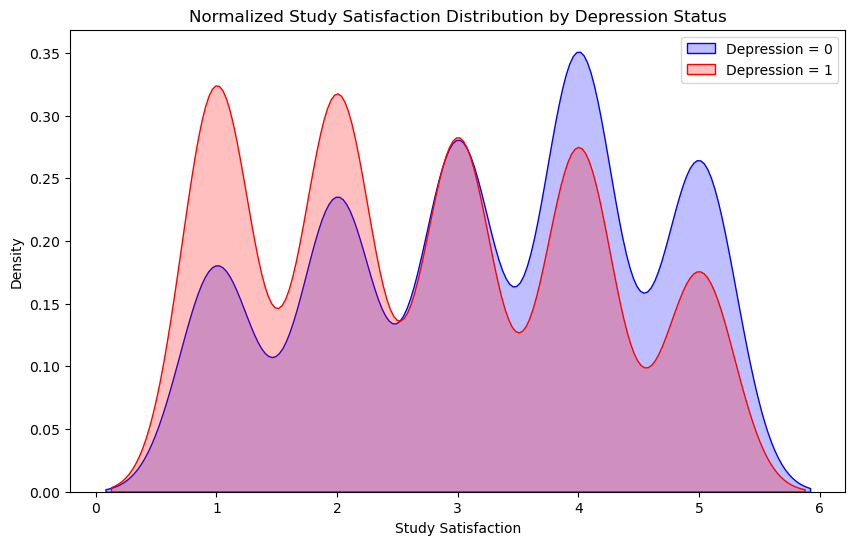

In [ ]:
plt.figure(figsize=(10, 6))


sns.kdeplot(
    data=train[train['Depression'] == 0], 
    x='Study Satisfaction', 
    color='blue', 
    label='Depression = 0', 
    fill=True,
    common_norm=False,  
    bw_adjust=1.5      
)

sns.kdeplot(
    data=train[train['Depression'] == 1], 
    x='Study Satisfaction', 
    color='red', 
    label='Depression = 1', 
    fill=True,
    common_norm=False,  
    bw_adjust=1.5     
)

plt.title('Normalized Study Satisfaction Distribution by Depression Status')
plt.xlabel('Study Satisfaction')
plt.ylabel('Density')
plt.legend()

plt.show()

### CGPA

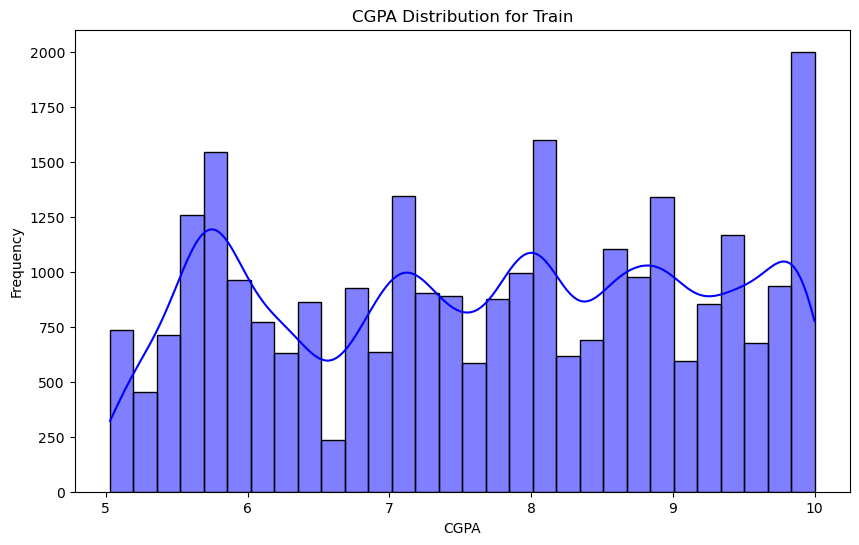

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['CGPA'], kde=True, color='blue', bins=30)
plt.title('CGPA Distribution for Train')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


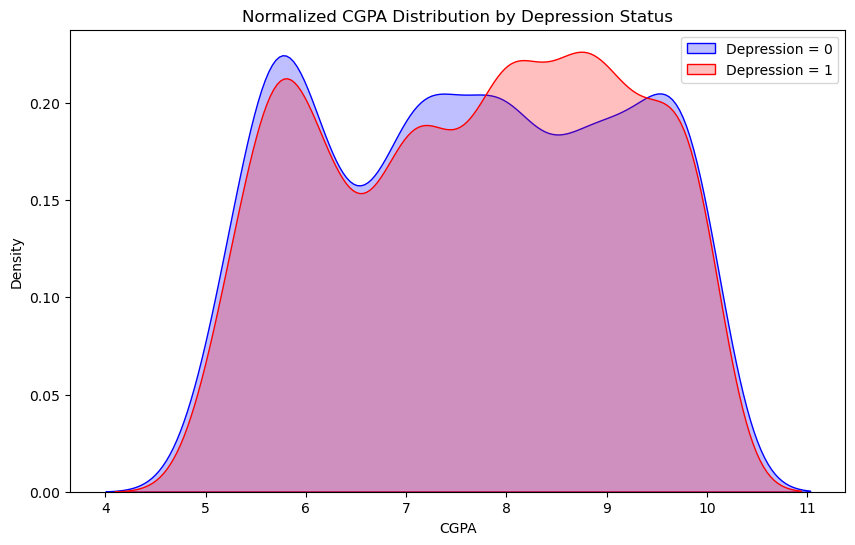

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=train[train['Depression'] == 0], 
    x='CGPA', 
    color='blue', 
    label='Depression = 0', 
    fill=True,
    common_norm=False,
    bw_adjust=1.5      
)

sns.kdeplot(
    data=train[train['Depression'] == 1], 
    x='CGPA', 
    color='red', 
    label='Depression = 1', 
    fill=True,
    common_norm=False, 
    bw_adjust=1.5     
)

plt.title('Normalized CGPA Distribution by Depression Status')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.legend()

plt.show()

### Work Pressure

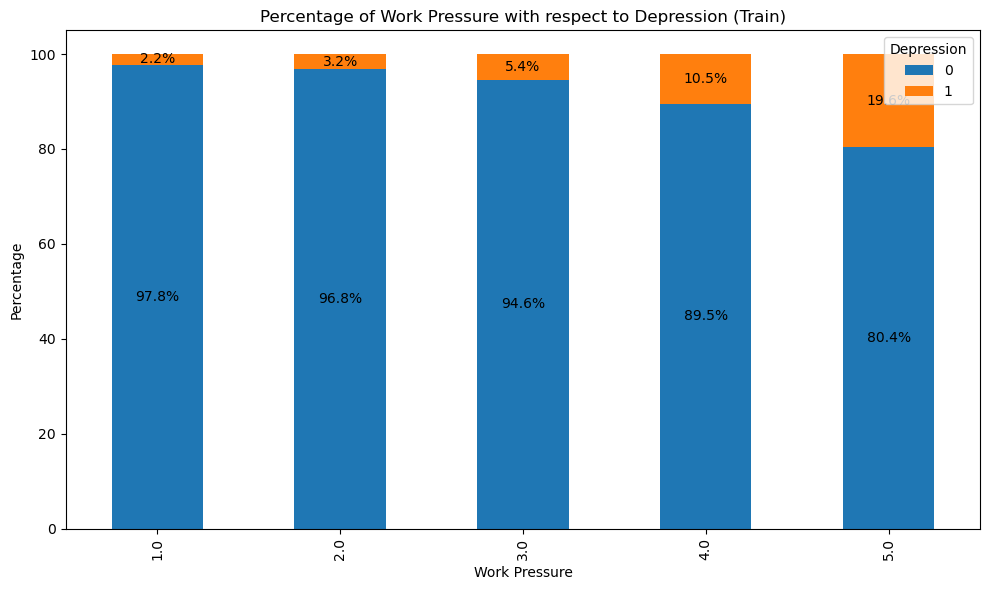

In [ ]:
train_work_pressure = train.groupby(['Work Pressure', 'Depression']).size().unstack().fillna(0)
train_work_pressure_percentage = train_work_pressure.div(train_work_pressure.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
work_ax = train_work_pressure_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Percentage')
plt.title('Percentage of Work Pressure with respect to Depression (Train)')
plt.xlabel('Work Pressure')

for p in work_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    work_ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

### Academic Pressure

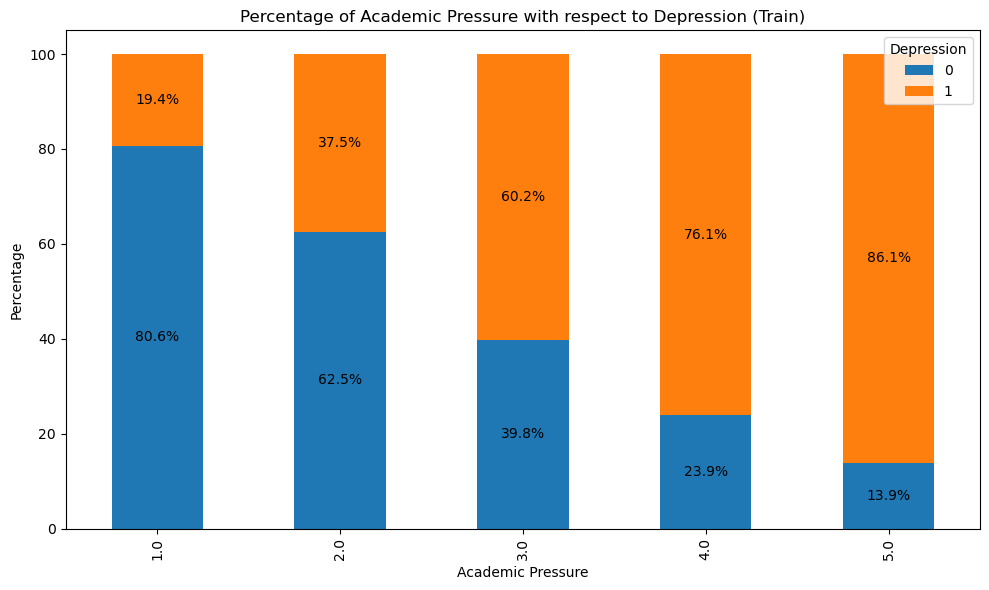

In [ ]:
train_academic_pressure = train.groupby(['Academic Pressure', 'Depression']).size().unstack().fillna(0)
train_academic_pressure_percentage = train_academic_pressure.div(train_academic_pressure.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
train_ax = train_academic_pressure_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Percentage')
plt.title('Percentage of Academic Pressure with respect to Depression (Train)')
plt.xlabel('Academic Pressure')

for p in train_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    train_ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


### Profession

C:\Users\Stefan\AppData\Local\Temp\ipykernel_884\1015947294.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_professions_train.values, y=top_10_professions_train.index, palette='viridis')
C:\Users\Stefan\AppData\Local\Temp\ipykernel_884\1015947294.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_professions_test.values, y=top_10_professions_test.index, palette='viridis')


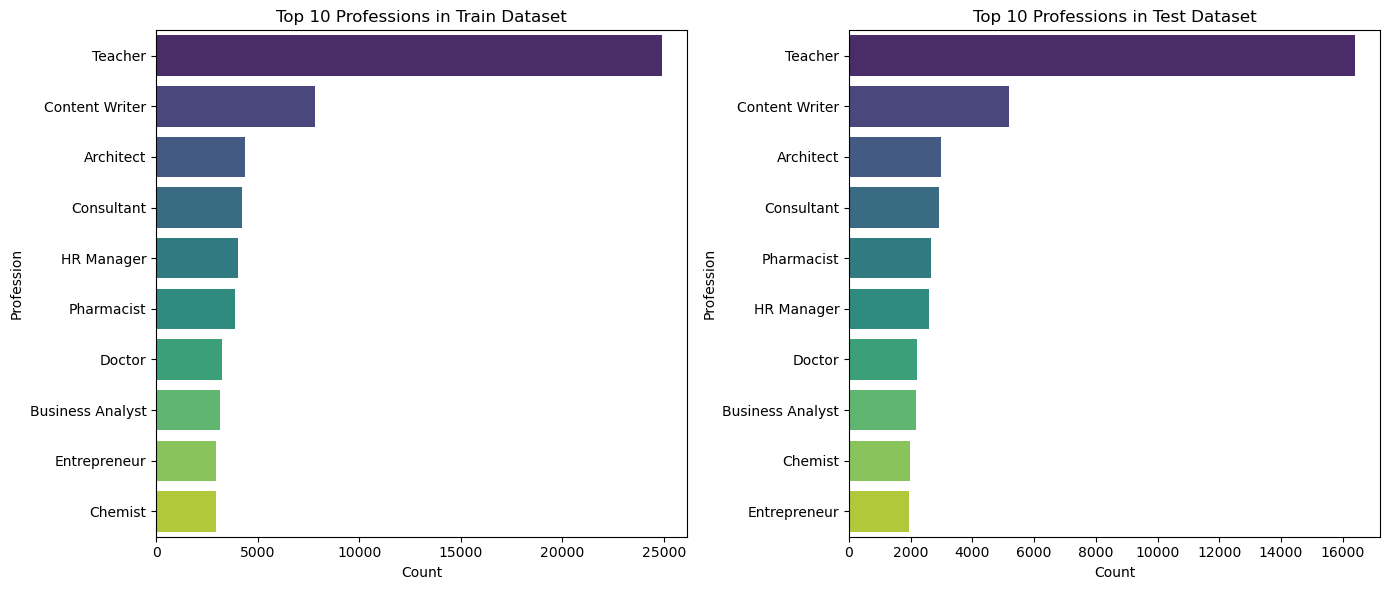

In [ ]:
top_10_professions_train = train['Profession'].value_counts().head(10)

top_10_professions_test = test['Profession'].value_counts().head(10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_professions_train.values, y=top_10_professions_train.index, palette='viridis')
plt.title('Top 10 Professions in Train Dataset')
plt.xlabel('Count')
plt.ylabel('Profession')

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_professions_test.values, y=top_10_professions_test.index, palette='viridis')
plt.title('Top 10 Professions in Test Dataset')
plt.xlabel('Count')
plt.ylabel('Profession')

plt.tight_layout()
plt.show()

In [22]:
dataset['Profession'].value_counts().head(37)

Profession
Teacher                   41291
Content Writer            13001
Architect                  7352
Consultant                 7149
HR Manager                 6623
Pharmacist                 6549
Doctor                     5453
Business Analyst           5347
Chemist                    4934
Entrepreneur               4903
Chef                       4706
Educational Consultant     4679
Data Scientist             3972
Researcher                 3824
Lawyer                     3709
Customer Support           3477
Pilot                      3361
Marketing Manager          3260
Travel Consultant          3048
Judge                      2901
Manager                    2892
Sales Executive            2878
Plumber                    2871
Electrician                2703
Financial Analyst          2622
Software Engineer          2512
Civil Engineer             2408
UX/UI Designer             2367
Digital Marketer           2314
Finanancial Analyst        2223
Accountant                 21

### Nan Values

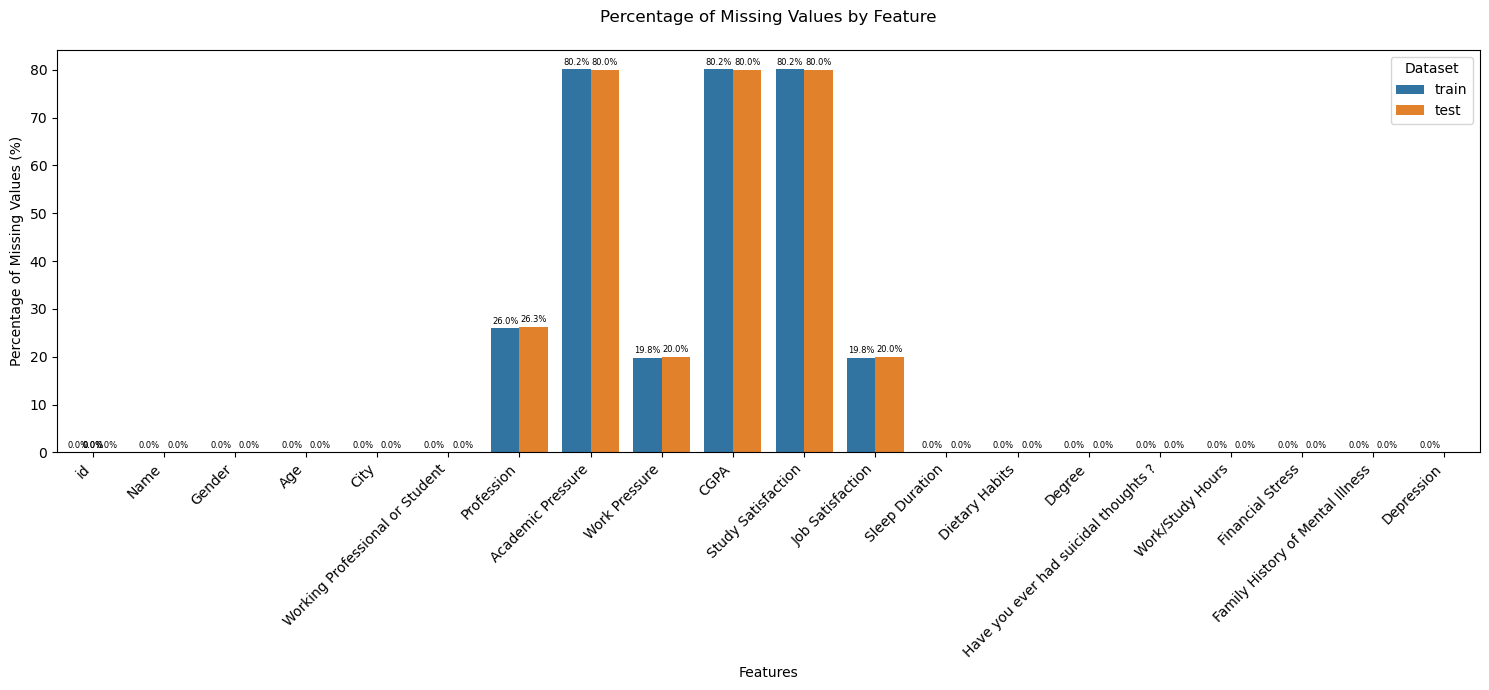

In [ ]:
missing_train_values = train.isnull().sum()
missing_test_values = test.isnull().sum()

missing_train_percent = (missing_train_values / len(train)) * 100
missing_test_percent = (missing_test_values / len(test)) * 100

missing_train = pd.DataFrame({
    'missing_values': missing_train_values,
    'missing_percent': missing_train_percent,
    'dataset': 'train'
})

missing_test = pd.DataFrame({
    'missing_values': missing_test_values,
    'missing_percent': missing_test_percent,
    'dataset': 'test'
})

missing_combined = pd.concat([missing_train, missing_test])

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=missing_combined, x=missing_combined.index, y='missing_percent', hue='dataset')

for p in ax.patches:
    percentage = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., 
            percentage + 0.5, 
            f'{percentage:.1f}%', 
            ha="center",
            va='bottom',
            fontsize=6)

plt.title('Percentage of Missing Values by Feature', pad=20)
plt.ylabel('Percentage of Missing Values (%)')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

### Working Professional or Student

In [24]:
dataset['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    187827
Student                  46673
Name: count, dtype: int64

### City
- we observe that there are 31 relevant City's so we will probably remove the noise

In [25]:
dataset['City'].value_counts()

City
Kalyan         10978
Patna           9812
Vasai-Virar     9662
Kolkata         9415
Ahmedabad       9290
               ...  
Krinda             1
Anvi               1
Kibara             1
Khushi             1
3.0                1
Name: count, Length: 124, dtype: int64

In [ ]:
top_35_cities = dataset['City'].value_counts().head(35)
print(top_35_cities)

City
Kalyan           10978
Patna             9812
Vasai-Virar       9662
Kolkata           9415
Ahmedabad         9290
Meerut            9189
Ludhiana          8771
Rajkot            8657
Srinagar          8621
Visakhapatnam     8592
Pune              8528
Mumbai            8095
Indore            7912
Agra              7873
Vadodara          7737
Surat             7726
Varanasi          7658
Hyderabad         7619
Kanpur            7376
Jaipur            7202
Lucknow           7140
Thane             7124
Nagpur            6957
Bangalore         6830
Chennai           6718
Delhi             6129
Ghaziabad         6106
Bhopal            5845
Faridabad         5464
Nashik            5326
Mihir                7
Vidya                7
Bhavna               6
City                 5
Pratyush             4
Name: count, dtype: int64


In [ ]:
train_cities = set(train['City'].unique())
test_cities = set(test['City'].unique())

cities_only_in_train = train_cities - test_cities
cities_only_in_test = test_cities - train_cities

train_only_counts = train[train['City'].isin(cities_only_in_train)]['City'].value_counts()
train_only_df = pd.DataFrame({
    'Count': train_only_counts,
    'Percentage': (train_only_counts/len(train) * 100).round(2)
})

test_only_counts = test[test['City'].isin(cities_only_in_test)]['City'].value_counts()
test_only_df = pd.DataFrame({
    'Count': test_only_counts,
    'Percentage': (test_only_counts/len(test) * 100).round(2)
})

print("Cities only in Training Data:")
print(train_only_df)
print("\nCities only in Test Data:")
print(test_only_df)



Cities only in Training Data:
                    Count  Percentage
City                                 
Mihir                   7         0.0
Nandini                 4         0.0
Harsha                  3         0.0
Mahi                    3         0.0
M.Com                   2         0.0
MCA                     2         0.0
Ayush                   2         0.0
Molkata                 2         0.0
Atharv                  2         0.0
Ishanabad               1         0.0
ME                      1         0.0
Rashi                   1         0.0
Kagan                   1         0.0
MSc                     1         0.0
Tushar                  1         0.0
Chhavi                  1         0.0
Kibara                  1         0.0
Researcher              1         0.0
Ithal                   1         0.0
Armaan                  1         0.0
Reyansh                 1         0.0
Nalyan                  1         0.0
Dhruv                   1         0.0
Galesabad           

### Gender
- nothing special

In [28]:
dataset['Gender'].value_counts()

Gender
Male      128726
Female    105774
Name: count, dtype: int64

C:\Users\Stefan\AppData\Local\Temp\ipykernel_884\2330106548.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_depression_counts = dataset.groupby(['Gender', 'Depression']).size().unstack().fillna(0)


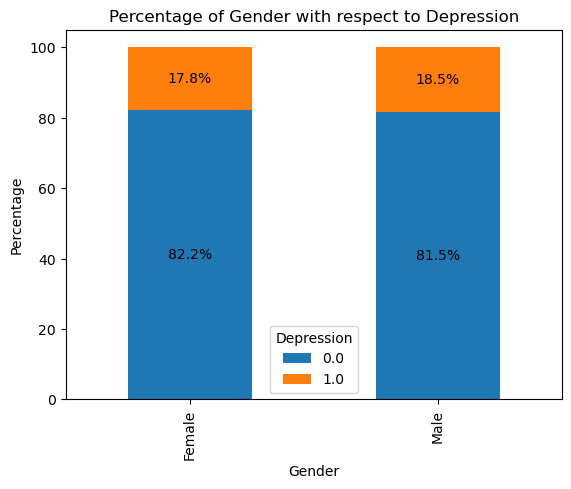

In [ ]:
gender_depression_counts = dataset.groupby(['Gender', 'Depression']).size().unstack().fillna(0)
gender_depression_percentage = gender_depression_counts.div(gender_depression_counts.sum(axis=1), axis=0) * 100

ax = gender_depression_percentage.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.title('Percentage of Gender with respect to Depression')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.show()

### Name
- nothing sepcial

In [30]:
dataset['Name'].value_counts().head(100)

Name
Rohan       5290
Aarav       3835
Rupak       3610
Aaradhya    3468
Anvi        3433
            ... 
Anirudh      992
Janvi        991
Aahana       988
Pallavi      968
Arnav        967
Name: count, Length: 100, dtype: int64

In [31]:
dataset['Name'].to_csv('names.csv', index=False)

### Age
- younger people are much more likely to be in depression (3rd plot)

In [32]:
dataset['Age'].describe()

count    234500.000000
mean         40.361847
std          12.387870
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

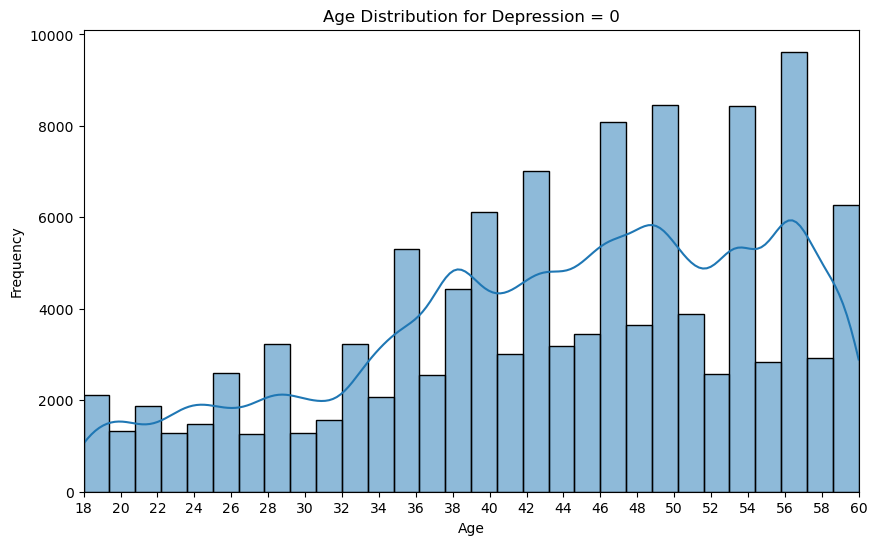

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset[dataset['Depression'] == 0], x='Age', bins=30, kde=True)
plt.title('Age Distribution for Depression = 0')
plt.xlabel('Age')
plt.ylabel('Frequency')

first_value = dataset['Age'].min()
plt.xlim(first_value, dataset['Age'].max())
plt.xticks(range(int(first_value), int(dataset['Age'].max()) + 1, 2))

plt.show()


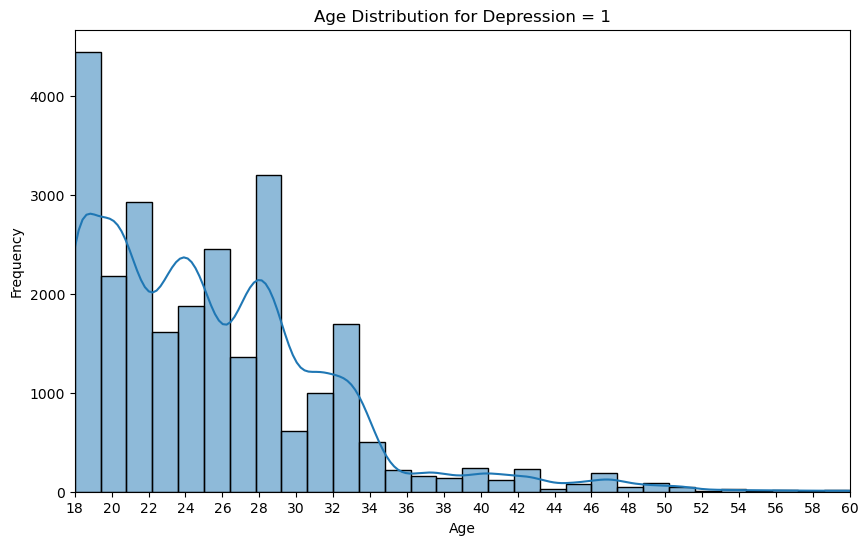

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset[dataset['Depression'] == 1], x='Age', bins=30, kde=True)
plt.title('Age Distribution for Depression = 1')
plt.xlabel('Age')
plt.ylabel('Frequency')

first_value = dataset['Age'].min()
plt.xlim(first_value, dataset['Age'].max())
plt.xticks(range(int(first_value), int(dataset['Age'].max()) + 1, 2))

plt.show()


C:\Users\Stefan\AppData\Local\Temp\ipykernel_884\1547637677.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_depression_counts = dataset.groupby(['AgeGroup', 'Depression']).size().unstack().fillna(0)


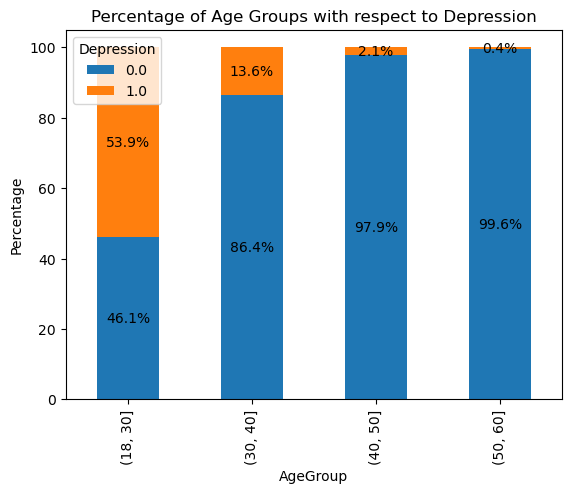

In [ ]:
age_bins = [18, 30, 40, 50, 60]
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=age_bins )

age_depression_counts = dataset.groupby(['AgeGroup', 'Depression']).size().unstack().fillna(0)
age_depression_percentage = age_depression_counts.div(age_depression_counts.sum(axis=1), axis=0) * 100

ax = age_depression_percentage.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.title('Percentage of Age Groups with respect to Depression')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')

plt.show()

dataset.drop('AgeGroup', axis=1, inplace=True)

## Data Preprocessing

In [36]:
dataset.drop('id', axis=1, inplace=True)


In [ ]:
original_dataset = pd.read_csv('dataset.csv')
original_dataset.drop('id', axis=1, inplace=True)
original_dataset['is_original'] = True  # Flag original data

# Assuming 'dataset' contains the artificially generated data
dataset['is_original'] = False  # Flag artificial data

dataset = pd.concat([dataset, original_dataset[original_dataset['Depression'].notnull()]], axis=0)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class RareCategoryReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=100):
        self.threshold = threshold
        self.frequent_categories_ = {}
        
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            counts = X[col].value_counts()
            self.frequent_categories_[col] = counts[counts >= self.threshold].index.tolist()
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        for col in X.columns:
            frequent = self.frequent_categories_[col]
            X[col] = X[col].where(X[col].isin(frequent), np.nan)
        return X

categorical_cols = [
    'Gender', 'City', 'Working Professional or Student', 'Profession',
    'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness', 'Sleep Duration', 'Name'
]

numerical_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress'
]

features = dataset.drop(['Depression'], axis=1)
features = features.drop('is_original', axis=1) 

is_original = dataset['is_original']

train_indices = dataset['Depression'].notna()
test_indices = dataset['Depression'].isna()

X_train = features.loc[train_indices]
y_train = dataset.loc[train_indices, 'Depression'].astype('int')
X_test = features.loc[test_indices]


categorical_pipeline = Pipeline(steps=[
    ('rare_category_replacer', RareCategoryReplacer(threshold=100)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_cols),
    ('num', numerical_pipeline, numerical_cols)
], remainder='drop') 

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('rare_category_replacer',
                                                                   RareCategoryReplacer()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'City',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Profession',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness',
                                                   'Sleep Duration', 'Name']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress'])]))])

In [ ]:
preprocessor = pipeline.named_steps['preprocessor']

cat_pipeline = preprocessor.named_transformers_['cat']

ohe = cat_pipeline.named_steps['onehot_encoder']

ohe_feature_names = ohe.get_feature_names_out(input_features=categorical_cols)

numerical_feature_names = numerical_cols

feature_names = np.concatenate([ohe_feature_names, numerical_feature_names])


In [ ]:
X_train_transformed = pipeline.transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)

X_test_transformed = pipeline.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)



In [ ]:
from sklearn import set_config
set_config(display='diagram')

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('rare_category_replacer',
                                                                   RareCategoryReplacer()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'City',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Profession',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness',
                                                   'Sleep Duration', 'Name']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress'])]))])

In [42]:
X_train_transformed_df

,Gender_Female,Gender_Male,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,...,Name_Zara,Name_Zoya,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,3.0,5.0,7.77,3.0,2.0,1.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,3.0,4.0,7.77,3.0,3.0,7.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,33.0,5.0,3.0,8.97,2.0,3.0,3.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,3.0,5.0,7.77,3.0,1.0,10.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,30.0,3.0,1.0,7.77,3.0,1.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,3.0,5.0,7.77,3.0,4.0,2.0,4.0
140696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41.0,3.0,5.0,7.77,3.0,4.0,6.0,5.0
140697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24.0,3.0,3.0,7.77,3.0,1.0,4.0,4.0
140698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,3.0,5.0,7.77,3.0,2.0,10.0,1.0


In [43]:
X_test_transformed_df

,Gender_Female,Gender_Male,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,...,Name_Zara,Name_Zoya,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,53.0,3.0,2.0,7.77,3.0,5.0,9.0,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,58.0,3.0,2.0,7.77,3.0,4.0,6.0,4.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,53.0,3.0,4.0,7.77,3.0,1.0,12.0,4.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,5.0,3.0,6.84,1.0,3.0,10.0,4.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.0,3.0,5.0,7.77,3.0,5.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,49.0,3.0,3.0,7.77,3.0,5.0,2.0,2.0
93796,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,3.0,5.0,7.77,3.0,1.0,11.0,3.0
93797,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24.0,1.0,3.0,7.51,4.0,3.0,7.0,1.0
93798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,3.0,4.0,7.77,3.0,2.0,7.0,5.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier


model = LGBMClassifier(verbose=-1, random_state=0)

# Assuming previous steps have been executed and we have X_train_transformed_df, y_train, and is_original

# Get indices of artificial and original data
artificial_indices = X_train_transformed_df.index[is_original.loc[train_indices] == False]
original_indices = X_train_transformed_df.index[is_original.loc[train_indices] == True]

X_artificial = X_train_transformed_df.loc[artificial_indices]
y_artificial = y_train.loc[artificial_indices]

X_original = X_train_transformed_df.loc[original_indices]
y_original = y_train.loc[original_indices]

model = LGBMClassifier(verbose=-1, random_state=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

accuracies = []

for train_index, val_index in skf.split(X_artificial, y_artificial):
    X_train_fold_artificial = X_artificial.iloc[train_index]
    y_train_fold_artificial = y_artificial.iloc[train_index]
    X_val_fold_artificial = X_artificial.iloc[val_index]
    y_val_fold_artificial = y_artificial.iloc[val_index]
    
    X_train_fold = pd.concat([X_train_fold_artificial, X_original], axis=0)
    y_train_fold = pd.concat([y_train_fold_artificial, y_original], axis=0)
    
    model.fit(X_train_fold, y_train_fold)
    
    y_val_pred_fold = model.predict(X_val_fold_artificial)
    
    accuracy_fold = accuracy_score(y_val_fold_artificial, y_val_pred_fold)
    accuracies.append(accuracy_fold)

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')


Mean Accuracy: 0.9416773276474769


In [ ]:
artificial_indices = X_train_transformed_df.index[is_original.loc[train_indices] == False]
original_indices = X_train_transformed_df.index[is_original.loc[train_indices] == True]

X_artificial = X_train_transformed_df.loc[artificial_indices]
y_artificial = y_train.loc[artificial_indices]

X_original = X_train_transformed_df.loc[original_indices]
y_original = y_train.loc[original_indices]


In [ ]:
import optuna
def make_objective(X_artificial, y_artificial, X_original, y_original):
    def objective(trial):
        lgbm_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 400),
            'learning_rate': trial.suggest_float('learning_rate', 1e-2, 1e-1, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-1, 100.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-1, 100.0, log=True),
            'random_state': 0,
            'n_jobs': -1
        }

        model = LGBMClassifier(**lgbm_params, verbose=-1)

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        accuracies = []

        for train_index, val_index in skf.split(X_artificial, y_artificial):
            X_train_fold_artificial = X_artificial.iloc[train_index]
            y_train_fold_artificial = y_artificial.iloc[train_index]
            X_val_fold_artificial = X_artificial.iloc[val_index]
            y_val_fold_artificial = y_artificial.iloc[val_index]

            X_train_fold = pd.concat([X_train_fold_artificial, X_original], axis=0)
            y_train_fold = pd.concat([y_train_fold_artificial, y_original], axis=0)

            model.fit(X_train_fold_artificial, y_train_fold_artificial)

            y_val_pred_fold = model.predict(X_val_fold_artificial)

            accuracy_fold = accuracy_score(y_val_fold_artificial, y_val_pred_fold)
            accuracies.append(accuracy_fold)

        mean_accuracy = np.mean(accuracies)

        return mean_accuracy

    return objective

objective = make_objective(X_artificial, y_artificial, X_original, y_original)

study_lgb = optuna.create_study(direction='maximize')

study_lgb.optimize(objective, n_trials=50)

[I 2024-11-09 21:32:02,135] A new study created in memory with name: no-name-ccc9bb1a-6b04-47ab-86b0-1dcf0f5431fe
[I 2024-11-09 21:32:13,482] Trial 0 finished with value: 0.9401812366737741 and parameters: {'n_estimators': 101, 'learning_rate': 0.04522204575888336, 'max_depth': 9, 'num_leaves': 76, 'min_child_samples': 20, 'subsample': 0.9254905693160516, 'colsample_bytree': 0.5065185340878733, 'reg_alpha': 0.10815189910468481, 'reg_lambda': 0.23430414166514632}. Best is trial 0 with value: 0.9401812366737741.
[I 2024-11-09 21:32:20,355] Trial 1 finished with value: 0.9376048329779673 and parameters: {'n_estimators': 85, 'learning_rate': 0.0398708201733428, 'max_depth': 7, 'num_leaves': 94, 'min_child_samples': 18, 'subsample': 0.5125236468194847, 'colsample_bytree': 0.5144953901647886, 'reg_alpha': 4.461248423589637, 'reg_lambda': 1.6892226083567308}. Best is trial 0 with value: 0.9401812366737741.
[I 2024-11-09 21:32:32,677] Trial 2 finished with value: 0.9427967306325515 and paramet

In [52]:
lgb_params = {
    'n_estimators': 295, 
    'learning_rate': 0.08984030962868866, 
    'max_depth': 7, 
    'num_leaves': 91, 
    'min_child_samples': 14, 
    'subsample': 0.9996972380381748, 
    'colsample_bytree': 0.7333031919737074, 
    'reg_alpha': 1.0392266154223286, 
    'reg_lambda': 0.10309777348834603
}

In [56]:
# Combine all training data
X_train_full = pd.concat([X_artificial, X_original], axis=0)
y_train_full = pd.concat([y_artificial, y_original], axis=0)

In [ ]:
model = LGBMClassifier(**lgb_params, verbose=-1, random_state=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

accuracies = []

for train_index, val_index in skf.split(X_train_full, y_train_full):
    X_train_fold = X_train_full.iloc[train_index]
    y_train_fold = y_train_full.iloc[train_index]
    X_val_fold = X_train_full.iloc[val_index]
    y_val_fold = y_train_full.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)

    y_val_pred_fold = model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    accuracies.append(accuracy_fold)

mean_accuracy = np.mean(accuracies)

print(f'Mean Accuracy: {mean_accuracy}')

Mean Accuracy: 0.9502914001421464


In [ ]:
model.fit(X_train_full, y_train_full)


y_test_pred = model.predict(X_test_transformed_df)

sample_submission['Depression'] = y_test_pred
sample_submission.to_csv('submissionCONCAT.csv', index=False)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

accuracies = []

for train_index, val_index in skf.split(X_artificial, y_artificial):
    X_train_fold_artificial = X_artificial.iloc[train_index]
    y_train_fold_artificial = y_artificial.iloc[train_index]
    X_val_fold_artificial = X_artificial.iloc[val_index]
    y_val_fold_artificial = y_artificial.iloc[val_index]

    model.fit(X_train_fold_artificial, y_train_fold_artificial)

    y_val_pred_fold = model.predict(X_val_fold_artificial)

    accuracy_fold = accuracy_score(y_val_fold_artificial, y_val_pred_fold)
    accuracies.append(accuracy_fold)

mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

Mean Accuracy: 0.9461300639658848


In [65]:
model.fit(X_artificial, y_artificial)

y_test_pred = model.predict(X_test_transformed_df)

sample_submission['Depression'] = y_test_pred

sample_submission.to_csv('submissionLEGIT.csv', index=False)